## 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
!pip install ipywidgets widgetsnbextension pandas-profiling

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [1]:
# Torch will be used to load the YOLO model and make detections
import torch
# matplotlib will be used for visualising images
from matplotlib import pyplot as plt
# Numpy will be used for array transformation
import numpy as np
# OpenCV helps access the webcam and render feeds
import cv2

 ## 2. Load Model

In [2]:
# downloading the pre-trained ultralytics model from Pytorch hub
# torch hub is like tenserflow but pytorch equivalent
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')

Using cache found in C:\Users\Jimmy/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-11 torch 1.8.2+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
           

## 3. Make Detections with Images

In [4]:
# img = 'https://ultralytics.com/images/zidane.jpg'
# img = 'bao1.jpg'
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKlewM5XH0Wqi6jGo2MnCDIXh9WzXIFSZx0A&usqp=CAU'

In [5]:
results = model(img)
results.print()

image 1/1: 194x259 5 traffic lights
Speed: 2622.5ms pre-process, 121.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


In [6]:
# tap . and tab to show the components
# xyxy: The output from running results.xyxy is as follows: 
# -xmin, ymin, xmax, ymax, confidence, class
results.xyxy

[tensor([[ 99.03993,  85.43742, 107.14758, 103.55984,   0.88665,   9.00000],
         [ 45.13480,  77.42815,  53.27507,  99.91492,   0.83574,   9.00000],
         [193.07799, 119.59361, 201.01822, 137.69196,   0.76900,   9.00000],
         [122.92117,  88.03745, 134.02548, 103.86404,   0.37839,   9.00000],
         [ 73.47724,  84.64827,  85.21796, 100.05634,   0.25471,   9.00000]])]

In [7]:
results.show()

In [8]:
# return the image with the detections drawn on it
results.render()

[array([[[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 91, 148, 215],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 82, 140, 203],
         [ 82, 140, 203],
         [ 82, 140, 203]],
 
        [[ 92, 149, 216],
         [ 91, 148, 215],
         [ 91, 148, 215],
         ...,
         [ 83, 141, 204],
         [ 83, 141, 204],
         [ 83, 141, 204]],
 
        ...,
 
        [[126, 108,  86],
         [126, 108,  86],
         [126, 108,  86],
         ...,
         [100,  86,  77],
         [100,  86,  77],
         [100,  86,  77]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
         [ 90,  75,  68],
         [ 90,  75,  68]],
 
        [[127, 109,  87],
         [127, 109,  87],
         [127, 109,  87],
         ...,
         [ 90,  75,  68],
  

In [9]:
np.array(results.render()).shape

(1, 194, 259, 3)

In [10]:
np.squeeze(results.render()).shape

(194, 259, 3)

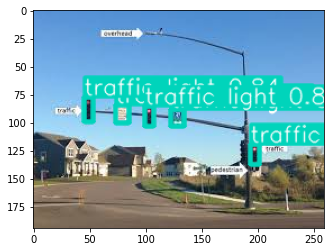

In [11]:
# render
# %matplotlib inline: the matplotlib magic function passed in the inline
# argument to make sure that it displays all matplotlib output in the 
# notebook instead of an external window
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## 4. Real Time Detections

In [12]:
# test video
# cap = cv2.VideoCapture('Space Invaders 2021-11-04 23-10-02.mp4')

# test real camera
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 5. Data processing

In [13]:
import numpy as np
import pandas as pd
import os

In [43]:
ANNOTATIONS_PATH = os.path.join('archive', 'Annotations', 'Annotations')

paths = {
    'DAY_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'dayTrain'),
    'NIGHT_TRAIN_PATH' : os.path.join(ANNOTATIONS_PATH, 'nightTrain'),
    'DAY_IMAGE_PATH' : os.path.join('archive', 'dayTrain', 'dayTrain'),
    'NIGHT_IMAGE_PATH' : os.path.join('archive', 'nightTrain', 'nightTrain')
}

# try to implement the first day's training dataset

In [44]:
os.listdir(paths['DAY_TRAIN_PATH'])

['dayClip1',
 'dayClip10',
 'dayClip11',
 'dayClip12',
 'dayClip13',
 'dayClip2',
 'dayClip3',
 'dayClip4',
 'dayClip5',
 'dayClip6',
 'dayClip7',
 'dayClip8',
 'dayClip9']

In [45]:
day_data = []
for file in os.listdir(paths['DAY_TRAIN_PATH']):
    day_df = pd.read_csv(os.path.join(paths['DAY_TRAIN_PATH'], file, 'frameAnnotationsBOX.csv'), sep=';')
    day_data.append(day_df)    
day_data_df = pd.concat(day_data)
day_data_df['isDay'] = 1

night_data = []
for file in os.listdir(paths['NIGHT_TRAIN_PATH']):
    night_df = pd.read_csv(os.path.join(paths['NIGHT_TRAIN_PATH'], file, 'frameAnnotationsBOX.csv'), sep=';')
    night_data.append(night_df)
night_data_df = pd.concat(night_data)
night_data_df['isDay'] = 0

df = pd.concat([day_data_df, night_data_df])

In [46]:
df

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,...,Origin file,Origin frame number,Origin track,Origin track frame number,isDay
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,...,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,1
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,...,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,1
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,...,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,1
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,...,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,1
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,...,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,1
...,...,...,...,...,...,...,...,...,...,...,...
3231,nightTraining/nightClip5--01450.jpg,go,937,221,976,...,nightTraining/nightClip5/clip5.mp4,1450,nightTraining/nightClip5/clip5.mp4,1450,0
3232,nightTraining/nightClip5--01451.jpg,go,467,36,512,...,nightTraining/nightClip5/clip5.mp4,1451,nightTraining/nightClip5/clip5.mp4,1451,0
3233,nightTraining/nightClip5--01451.jpg,go,937,219,976,...,nightTraining/nightClip5/clip5.mp4,1451,nightTraining/nightClip5/clip5.mp4,1451,0
3234,nightTraining/nightClip5--01452.jpg,go,460,33,506,...,nightTraining/nightClip5/clip5.mp4,1452,nightTraining/nightClip5/clip5.mp4,1452,0


In [47]:
# check for duplicate column
np.all(df['Origin file'] == df['Origin track']), np.all(df['Origin frame number'] == df['Origin track frame number'])

(True, True)

In [48]:
# drop duplicate columns and 'Origin file' columns
df = df.drop(columns=['Origin track', 'Origin track frame number', 'Origin file'])
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isDay
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,358,0,1
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,411,0,1
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,357,1,1
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,410,1,1
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,356,2,1


In [49]:
def simplifyFilename(file):
    splitted = file.split('/')
    simplify = splitted[-1]
    return simplify
df['Filename'] = df['Filename'].apply(simplifyFilename)
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isDay
0,dayClip1--00000.jpg,go,698,333,710,358,0,1
1,dayClip1--00000.jpg,go,846,391,858,411,0,1
2,dayClip1--00001.jpg,go,698,337,710,357,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,2,1


In [50]:
def simplifyFilename(file):
    fileName = file.split('.')[0]
    numberName = fileName.split('--')[1]
    imgNum = int(numberName)
    return imgNum
df['imgNum'] = df['Filename'].apply(simplifyFilename)

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isDay,imgNum
0,dayClip1--00000.jpg,go,698,333,710,358,0,1,0
1,dayClip1--00000.jpg,go,846,391,858,411,0,1,0
2,dayClip1--00001.jpg,go,698,337,710,357,1,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,2,1,2


In [51]:
df

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isDay,imgNum
0,dayClip1--00000.jpg,go,698,333,710,358,0,1,0
1,dayClip1--00000.jpg,go,846,391,858,411,0,1,0
2,dayClip1--00001.jpg,go,698,337,710,357,1,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,2,1,2
...,...,...,...,...,...,...,...,...,...
3231,nightClip5--01450.jpg,go,937,221,976,290,1450,0,1450
3232,nightClip5--01451.jpg,go,467,36,512,117,1451,0,1451
3233,nightClip5--01451.jpg,go,937,219,976,288,1451,0,1451
3234,nightClip5--01452.jpg,go,460,33,506,114,1452,0,1452


In [52]:
# Changing Column Names
df.columns = ['image','annotation','left_x','upper_y','right_x','lower_y','frame','isDay', 'imgNum']
df.head()

,image,annotation,left_x,upper_y,right_x,lower_y,frame,isDay,imgNum
0,dayClip1--00000.jpg,go,698,333,710,358,0,1,0
1,dayClip1--00000.jpg,go,846,391,858,411,0,1,0
2,dayClip1--00001.jpg,go,698,337,710,357,1,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,2,1,2


In [53]:
df

,image,annotation,left_x,upper_y,right_x,lower_y,frame,isDay,imgNum
0,dayClip1--00000.jpg,go,698,333,710,358,0,1,0
1,dayClip1--00000.jpg,go,846,391,858,411,0,1,0
2,dayClip1--00001.jpg,go,698,337,710,357,1,1,1
3,dayClip1--00001.jpg,go,847,390,859,410,1,1,1
4,dayClip1--00002.jpg,go,698,331,710,356,2,1,2
...,...,...,...,...,...,...,...,...,...
3231,nightClip5--01450.jpg,go,937,221,976,290,1450,0,1450
3232,nightClip5--01451.jpg,go,467,36,512,117,1451,0,1451
3233,nightClip5--01451.jpg,go,937,219,976,288,1451,0,1451
3234,nightClip5--01452.jpg,go,460,33,506,114,1452,0,1452


In [54]:
df = df.set_index("imgNum")

In [55]:
df

,image,annotation,left_x,upper_y,right_x,lower_y,frame,isDay
imgNum,,,,,,,,
0,dayClip1--00000.jpg,go,698,333,710,358,0,1
0,dayClip1--00000.jpg,go,846,391,858,411,0,1
1,dayClip1--00001.jpg,go,698,337,710,357,1,1
1,dayClip1--00001.jpg,go,847,390,859,410,1,1
2,dayClip1--00002.jpg,go,698,331,710,356,2,1
...,...,...,...,...,...,...,...,...
1450,nightClip5--01450.jpg,go,937,221,976,290,1450,0
1451,nightClip5--01451.jpg,go,467,36,512,117,1451,0
1451,nightClip5--01451.jpg,go,937,219,976,288,1451,0


In [56]:
df = df[df.index % 5 == 0]  # Selects every 5rd image starting from 0
df

,image,annotation,left_x,upper_y,right_x,lower_y,frame,isDay
imgNum,,,,,,,,
0,dayClip1--00000.jpg,go,698,333,710,358,0,1
0,dayClip1--00000.jpg,go,846,391,858,411,0,1
5,dayClip1--00005.jpg,go,698,332,710,352,5,1
5,dayClip1--00005.jpg,go,853,383,865,408,5,1
10,dayClip1--00010.jpg,go,698,331,713,351,10,1
...,...,...,...,...,...,...,...,...
1440,nightClip5--01440.jpg,go,923,251,957,314,1440,0
1445,nightClip5--01445.jpg,go,498,84,539,156,1445,0
1445,nightClip5--01445.jpg,go,930,247,967,310,1445,0


In [57]:
annotations = df['annotation'].unique()
annotations

array(['go', 'stop', 'stopLeft', 'warning', 'goLeft', 'warningLeft'], dtype=object)

In [58]:
print("Number of Unique Images: ",df.image.nunique(),'/',df.shape[0])

Number of Unique Images:  3608 / 10395


In [30]:
day_file_list = os.listdir(paths['DAY_TRAIN_PATH'])
night_file_list = os.listdir(paths['NIGHT_TRAIN_PATH'])
file_list = day_file_list + night_file_list

In [31]:
file_list

['dayClip1',
 'dayClip10',
 'dayClip11',
 'dayClip12',
 'dayClip13',
 'dayClip2',
 'dayClip3',
 'dayClip4',
 'dayClip5',
 'dayClip6',
 'dayClip7',
 'dayClip8',
 'dayClip9',
 'nightClip1',
 'nightClip2',
 'nightClip3',
 'nightClip4',
 'nightClip5']

In [62]:
os.path.join(paths['DAY_TRAIN_PATH'])

'archive\\Annotations\\Annotations\\dayTrain'

In [ ]:
import shutil

# create labels folder
for file_name in file_list:
    # find the labels path
    if 'day' in file_name:
        label_path = os.path.join(paths['DAY_TRAIN_PATH'], file_name, 'labels')
    else:
        label_path = os.path.join(paths['NIGHT_TRAIN_PATH'], file_name, 'labels')
        
    # delete the labels folder if it exist
    try:
        shutil.rmtree(label_path)
    except OSError as e:
        print("Error: %s : %s" % (label_path, e.strerror))
    
    # create the labels folder
    os.mkdir(label_path)        

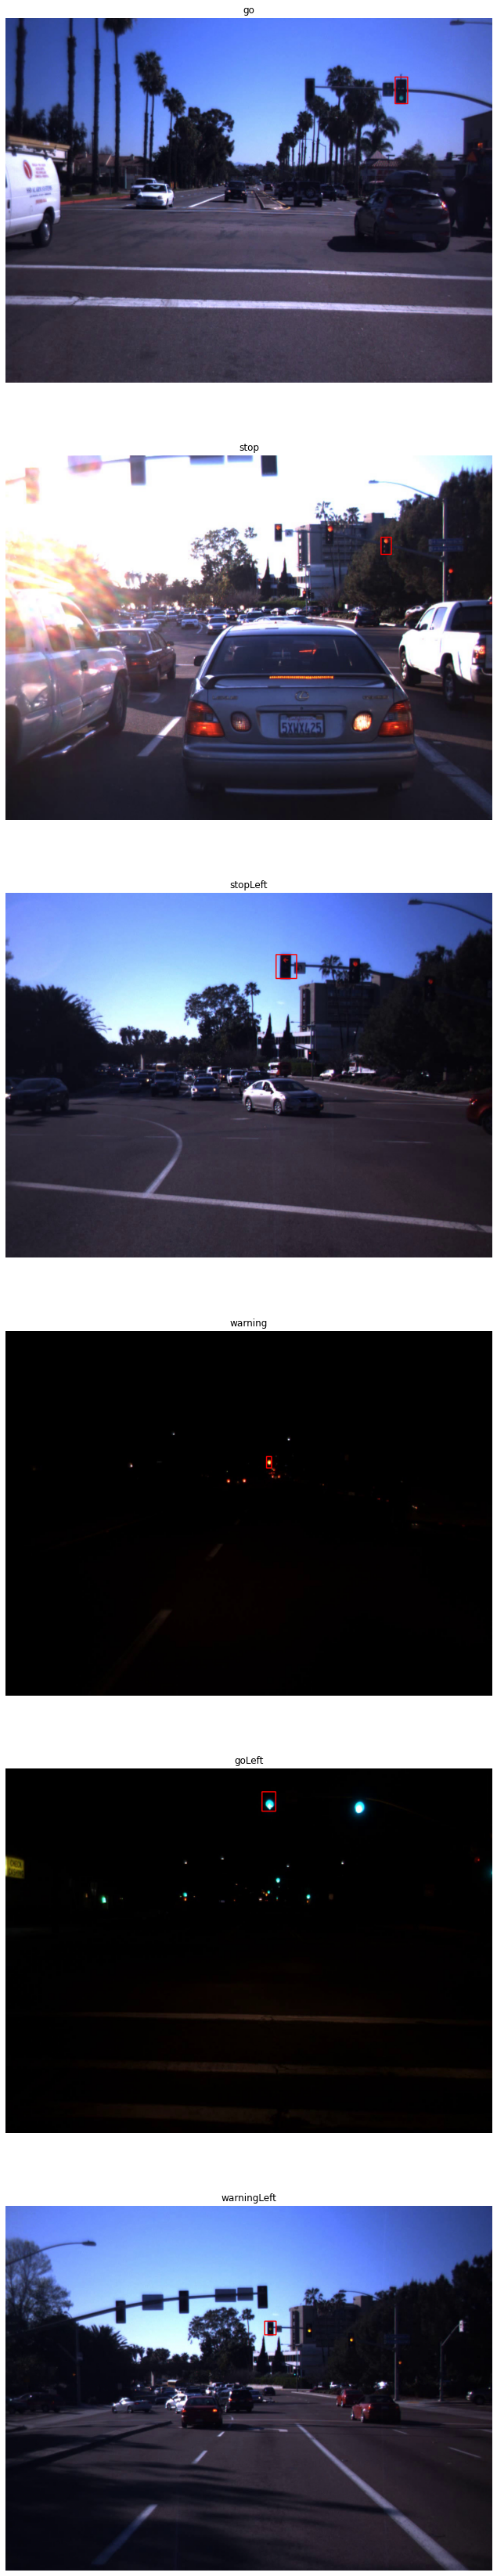

In [59]:
# make len(annotations) numbers of plots
fig, ax = plt.subplots(len(annotations),1,figsize=(15,10*len(annotations)))

# loop through annotations: go, stop...
for i, annotation in enumerate(annotations):
    # pick one sample belong to the annotation in the df
    # DataFrame.sample(n=None, frac=None, replace=False, weights=None, 
    #    random_state=None, axis=None, ignore_index=False)
    # Return a random sample of items from an axis of object.
    sample = df[df['annotation']==annotation].sample(1)
    # convert to numpy array from the sample df 
    sample_arr = sample[['left_x','upper_y','right_x','lower_y']].values[0]
    
    image_name = sample['image'].values[0]
    clipName = image_name.split('--')[0]
    isDay = sample['isDay'].values[0]
    if isDay == 1:        
        path = os.path.join(paths['DAY_IMAGE_PATH'], clipName, 'frames', image_name)
    else:
        path = os.path.join(paths['NIGHT_IMAGE_PATH'], clipName, 'frames', image_name)
    
    image = cv2.imread(path)
    # When the image file is read with the OpenCV function imread(), the order of colors 
    # is BGR (blue, green, red). We need to convert it to be RGB (red, green, blue)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    # Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(image,(sample_arr[0],sample_arr[1]),(sample_arr[2],sample_arr[3]),(255, 0, 0), 2)
    
    ax[i].set_title(annotation)
    ax[i].set_axis_off()
    ax[i].imshow(image)



## 6. Data Training

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [60]:
df

,image,annotation,left_x,upper_y,right_x,lower_y,frame,isDay
imgNum,,,,,,,,
0,dayClip1--00000.jpg,go,698,333,710,358,0,1
0,dayClip1--00000.jpg,go,846,391,858,411,0,1
5,dayClip1--00005.jpg,go,698,332,710,352,5,1
5,dayClip1--00005.jpg,go,853,383,865,408,5,1
10,dayClip1--00010.jpg,go,698,331,713,351,10,1
...,...,...,...,...,...,...,...,...
1440,nightClip5--01440.jpg,go,923,251,957,314,1440,0
1445,nightClip5--01445.jpg,go,498,84,539,156,1445,0
1445,nightClip5--01445.jpg,go,930,247,967,310,1445,0


In [61]:
for index, row in df.iterrows():
    textfile = row['image'].split('.')[0] + '.txt'
    image_name = row['image']
    clipName = image_name.split('--')[0]
    isDay = row['isDay']
    if isDay == 1:
        textfile_path = os.path.join(paths['DAY_TRAIN_PATH'], clipName, 'labels', textfile)
    else:
        textfile_path = os.path.join(paths['NIGHT_TRAIN_PATH'], clipName, 'labels', textfile)
    # YOLO Format: the YOLO annotation format represents the following values in order:
    # -class number, -x centre coordinate, -y cetre coordinate, -width, -height
    with open(textfile_path, 'a') as f:
        image_annotation = row['annotation']
        if image_annotation == 'go':
            image_class = 0
        elif image_annotation == 'stop':
            image_class = 1
        elif image_annotation == 'stopLeft':
            image_class = 2
        elif image_annotation == 'warning':
            image_class = 3
        elif image_annotation == 'goLeft':
            image_class = 4
        elif image_annotation == 'warningLeft':
            image_class = 5
            
        image_width = 1280
        image_height = 960
        
        left_x = row['left_x']
        upper_y = row['upper_y']
        right_x = row['right_x']
        lower_y = row['lower_y']
        
        x_center = (left_x + right_x) / 2.0 / image_width
        y_center = (upper_y + lower_y) / 2.0 / image_height
        width = (right_x - left_x) * 1.0 / image_width
        height = (lower_y - upper_y) * 1.0 / image_height
        
        f.write(str(image_class))
        f.write(' ')
        f.write(str(x_center))
        f.write(' ')
        f.write(str(y_center))
        f.write(' ')
        f.write(str(width))
        f.write(' ')
        f.write(str(height))
        f.write('\n')

## Training Options
Now, we train the network. We use various flags to set options regarding training.

#### img        : 
Size of image. The image is a square one. The original image is resized while maintaining the aspect ratio. The longer side of the image is resized to this number. The shorter side is padded with grey color.
#### batch: 
The batch size
#### epochs: 
Number of epochs to train for
#### data: 
Data YAML file that contains information about the dataset (path of images, labels)
#### workers: 
Number of CPU workers
#### cfg: 
Model architecture. There are 4 choices available: yolo5s.yaml, yolov5m.yaml, yolov5l.yaml, yolov5x.yaml. The size and complexity of these models increases in the ascending order and you can choose a model which suits the complexity of your object detection task. In case you want to work with a custom architecture, you will have to define a YAML file in the models folder specifying the network architecture.
#### weights: 
Pretrained weights you want to start training from. If you want to train from scratch, use --weights ' '
#### name: 
Various things about training such as train logs. Training weights would be stored in a folder named runs/train/name
#### hyp: 
YAML file that describes hyperparameter choices. For examples of how to define hyperparameters, see data/hyp.scratch.yaml. If unspecified, the file data/hyp.scratch.yaml is used.

In [ ]:
# may test some small samples for training to test the correctness
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 10 --data dataset.yaml --weights yolov5n.pt --workers 2

in the results.csv file, the columns represent:
-Epoch, -Gpu Memory, -Generalized loU(GloU), -Object Loss, -Classification Loss, -Total Loss, 
-Targets, -Image Size, -Precision, -Recall, -mAP @.5, -mAP@.5:.95, -vALIDATION gloU,
-Validation Object Loss, -Validation Class Loss

## 7. Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp12/weights/best.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'dayClip1--00009.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
img = os.path.join('data', 'images', 'dayClip1--00009.jpg')
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')
results = model(img)


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()